# Advanced processing

In the previous notebook, we have seen a very simple analysis pipeline. The great advantage of using Python is however that you get access to cutting edge method relatively easily. As you can also run regular commands from the notebook, you can also mix different softwares directly in your pipeline.

We illustrate these two points here with Cellpose, a generalistic deep learning based cell segmentation approach and Ilasitk, the popular software for ML based segmentation.

## Dataset

First we re-load our dataset:

In [1]:
import requests
import zipfile
from pathlib import Path

if not Path('BBBC013_v1_images_bmp').is_dir():
    url = 'https://data.broadinstitute.org/bbbc/BBBC013/BBBC013_v1_images_bmp.zip'
    myfile = requests.get(url, allow_redirects=True)
    open('BBBC013_v1_images_bmp.zip', 'wb').write(myfile.content)
    with zipfile.ZipFile('BBBC013_v1_images_bmp.zip', 'r') as zip_ref:
        zip_ref.extractall('.')

In [2]:
data_path = Path('BBBC013_v1_images_bmp')
file_list2 = list(data_path.glob('Channel2*.BMP'))


## Deep Learning made easy: example with cellpose

Cellpose is a deep learning algorithm that has been trained on a massive trove of data to identify nuclei and cells. The variety in the training set makes it extremely versatile so that retrainig is not necessary in most standard cases.

### Installing cellpose

Unlike Numpy, scikit-image etc. cellpose is not available by default on Colab, so you have to install it via pip:

In [12]:
%%bash
pip install cellpose
pip install git+https://github.com/guiwitz/microfilm.git@master#egg=microfilm
pip install imagecodecs

  Cloning https://github.com/guiwitz/microfilm.git (to revision master) to /tmp/pip-install-jxz0mzdt/microfilm
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Cloning https://github.com/guiwitz/nd2reader.git (to revision master) to /tmp/pip-install-jxz0mzdt/nd2reader
  Created wheel for microfilm: filename=microfilm-0.0.2.dev11+g06a762d-cp37-none-any.whl size=9802 sha256=7d1a1a757d8deb9b46361c7a2b55cb9259cec6c18870f0267c8b4be20fd988ed
  Stored in directory: /tmp/pip-ephem-wheel-cache-zlgct8oy/wheels/d0/c4/b6/02340665da49a886bb5a33201402799512e530c6fac55fd0fe
Successfully built microfilm
  Created wheel for nd2reader: filename=nd2reader-3.2.3.gw-py2.py3-none-any.whl size=35972 sha256=69afb49a556d307e0fcb5cca5f859454cae19251ec

  Running command git clone -q https://github.com/guiwitz/microfilm.git /tmp/pip-install-jxz0mzdt/microfilm
  Running command git clone -q https://github.com/guiwitz/nd2reader.git /tmp/pip-install-jxz0mzdt/nd2reader
  Running command git submodule update --init --recursive -q
ERROR: distributed 2021.4.0 has requirement dask>=2021.03.0, but you'll have dask 2.12.0 which is incompatible.


### Checking GPU

As cellpose is deep-learning based, it can exploit the powere of GPUs to run. On Colab you can choose to use a GPU by *changing the runtime type* in the Runtime menu. Check if the GPU is used:

In [4]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
Sat Apr 17 18:48:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |         

### Load and use a model

Now we can load a cellpose model and use it to segment the nuclei of our image:

In [5]:
from cellpose import models

model = models.Cellpose(gpu=True, model_type='nuclei')

Downloading: "https://www.cellpose.org/models/cyto_0" to /root/.cellpose/models/cyto_0
100%|██████████| 25.2M/25.2M [00:00<00:00, 79.4MB/s]
Downloading: "https://www.cellpose.org/models/cyto_1" to /root/.cellpose/models/cyto_1
100%|██████████| 25.2M/25.2M [00:00<00:00, 89.2MB/s]
Downloading: "https://www.cellpose.org/models/cyto_2" to /root/.cellpose/models/cyto_2
100%|██████████| 25.2M/25.2M [00:00<00:00, 96.0MB/s]
Downloading: "https://www.cellpose.org/models/cyto_3" to /root/.cellpose/models/cyto_3
100%|██████████| 25.2M/25.2M [00:00<00:00, 96.2MB/s]
Downloading: "https://www.cellpose.org/models/size_cyto_0.npy" to /root/.cellpose/models/size_cyto_0.npy
100%|██████████| 3.55k/3.55k [00:00<00:00, 8.82MB/s]
Downloading: "https://www.cellpose.org/models/cytotorch_0" to /root/.cellpose/models/cytotorch_0
100%|██████████| 25.3M/25.3M [00:00<00:00, 95.1MB/s]
Downloading: "https://www.cellpose.org/models/cytotorch_1" to /root/.cellpose/models/cytotorch_1
100%|██████████| 25.3M/25.3M [00:00

** TORCH CUDA version installed and working. **
>>>> using GPU


In [10]:
import skimage.io
image = skimage.io.imread(file_list2[0])

In [11]:
masks, flows, styles, diams = model.eval([image], diameter=15, channels=[0,0])

processing 1 image(s)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3829: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


time spent: running network 1.58s; flow+mask computation 1.05
estimated masks for 1 image(s) in 2.65 sec
>>>> TOTAL TIME 2.65 sec


Finally we can look at the output:

In [2]:
from microfilm import microplot
import matplotlib.pyplot as plt

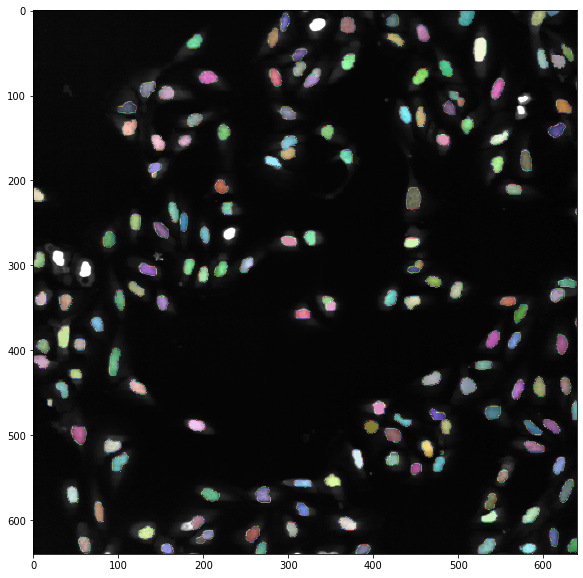

In [21]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(image, cmap = 'gray', vmax=100)
ax.imshow(masks[0], cmap=microplot.random_cmap(0.5));

## Using external software

Since we have access to the command line from the notebook, we can both install and run any software from there. Here we show how to do this with Ilastik.

We trained an Ilastik pixel classifier with three images and saved the project. Now we uploaded the project to GitHub to make it available and can use it in this notebook to segment *new* images.

### Installation

First we need to install Ilastik. We download it using ```wget``` and unzip it:

In [22]:
!wget https://files.ilastik.org/ilastik-1.3.3post3-Linux.tar.bz2

--2021-04-17 19:09:20--  https://files.ilastik.org/ilastik-1.3.3post3-Linux.tar.bz2
Resolving files.ilastik.org (files.ilastik.org)... 194.94.44.60
Connecting to files.ilastik.org (files.ilastik.org)|194.94.44.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 370980201 (354M) [application/x-bzip2]
Saving to: ‘ilastik-1.3.3post3-Linux.tar.bz2’

ilastik-1.3.3post3- 100%[===================>] 353.79M  19.3MB/s    in 24s     

2021-04-17 19:09:45 (14.5 MB/s) - ‘ilastik-1.3.3post3-Linux.tar.bz2’ saved [370980201/370980201]



In [23]:
!tar xjf ilastik-1.3.3post3-Linux.tar.bz2

Now we also download the Ilastik project from GitHub:

In [24]:
!wget https://github.com/guiwitz/ImagingStats/raw/master/ilastik/ilastik_demo.ilp

--2021-04-17 19:13:39--  https://github.com/guiwitz/ImagingStats/raw/master/ilastik/ilastik_demo.ilp
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/guiwitz/ImagingStats/master/ilastik/ilastik_demo.ilp [following]
--2021-04-17 19:13:39--  https://raw.githubusercontent.com/guiwitz/ImagingStats/master/ilastik/ilastik_demo.ilp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 295260 (288K) [application/octet-stream]
Saving to: ‘ilastik_demo.ilp’

ilastik_demo.ilp    100%[===================>] 288.34K  --.-KB/s    in 0.006s  

2021-04-17 19:13:39 (45.2 MB/s) - ‘ilastik_demo.ilp’ saved [295260/295260]


### Running ilastik

We now need to create a command that will run our analysis. For that we'll need the location of the ilastik project, the location of the ```run_ilastik.sh``` script to run Ilastik and the location one or more images. Then we usse the formatting described in the ilastik documentation to create the command:

In [29]:
import os
from pathlib import Path

ilastik_location = '/content/ilastik-1.3.3post3-Linux/run_ilastik.sh'
ilastik_project = '/content/ilastik_demo.ilp'
output = 'output'
if not os.path.isdir(output):
    os.makedirs('output')

command = ('%s --headless --readonly --project="%s" --output_format=tif --export_source="Simple Segmentation"'
               ' --output_filename_format="%s/{nickname}_results.tif" ') % (
        ilastik_location,
        ilastik_project,
        output)

files_to_process = [x.as_posix() for x in file_list2]
command_full = command+' '.join(files_to_process[0:3])

In [30]:
command_full

'/content/ilastik-1.3.3post3-Linux/run_ilastik.sh --headless --readonly --project="/content/ilastik_demo.ilp" --output_format=tif --export_source="Simple Segmentation" --output_filename_format="output/{nickname}_results.tif" BBBC013_v1_images_bmp/Channel2-25-C-01.BMP BBBC013_v1_images_bmp/Channel2-90-H-06.BMP BBBC013_v1_images_bmp/Channel2-68-F-08.BMP'

In [31]:
import subprocess

subprocess.call(command_full, shell=True)

0

Finally, we can check the result:

In [4]:
import skimage.io
import skimage.morphology

image_to_segment= skimage.io.imread('BBBC013_v1_images_bmp/Channel2-25-C-01.BMP')
segmented = skimage.io.imread('/content/output/Channel2-25-C-01_results.tif', plugin='tifffile')

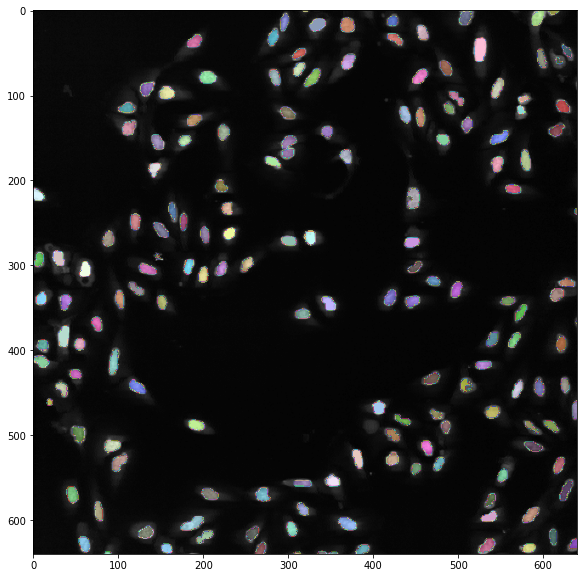

In [5]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(image_to_segment, cmap = 'gray', vmax=100)
ax.imshow(skimage.morphology.label(segmented), cmap=microplot.random_cmap(0.5));